In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import sys
import time

plt.rcParams["figure.figsize"] = (15, 10)  # in inches

# **A).**

## 1).

In [2]:
expected_taxi_rate = 5

#a).
print(f"a). probability = {scipy.stats.poisson.pmf(0, expected_taxi_rate*0.5):.5%}")

#b).
print(f"b). probability = {scipy.stats.poisson.pmf(0, expected_taxi_rate*2):.5%}")

#c).
print(f"c). probability = {scipy.stats.poisson.pmf(2, expected_taxi_rate*(1/3)):.5%}")

a). probability = 8.20850%
b). probability = 0.00454%
c). probability = 26.23272%


## 2).

In [3]:
expected_earthquake_rate = 10/50 # per year
 
#a).
print(f"a). probability = {scipy.stats.poisson.pmf(3, expected_earthquake_rate*10):.5%}")

#b).
print(f"b). probability = {1-scipy.stats.poisson.cdf(2, expected_earthquake_rate*10):.5%}")

#c).
print(f"c). probability = {scipy.stats.poisson.pmf(0, expected_earthquake_rate*(1/52)):.5%}")

a). probability = 18.04470%
b). probability = 32.33236%
c). probability = 99.61612%


## 3).

In [4]:
expected_errors_in_page = 6

print(f"probability = {scipy.stats.poisson.pmf(0, expected_errors_in_page*6)}")

probability = 2.3195228302435696e-16


## 4).

In [5]:
exepected_goals_in_game = 6/5

print(f"chance for me to win = {1-scipy.stats.poisson.pmf(1, exepected_goals_in_game):.2%}")
# yes i would

chance for me to win = 63.86%


## 5).

In [6]:
expected_lightning_strikes = 10.0/1000.0 # per dunam (thus /1000) per year

print(f"probability = {scipy.stats.poisson.pmf(2, expected_lightning_strikes)}")

probability = 4.9502491687458457e-05


## 6).

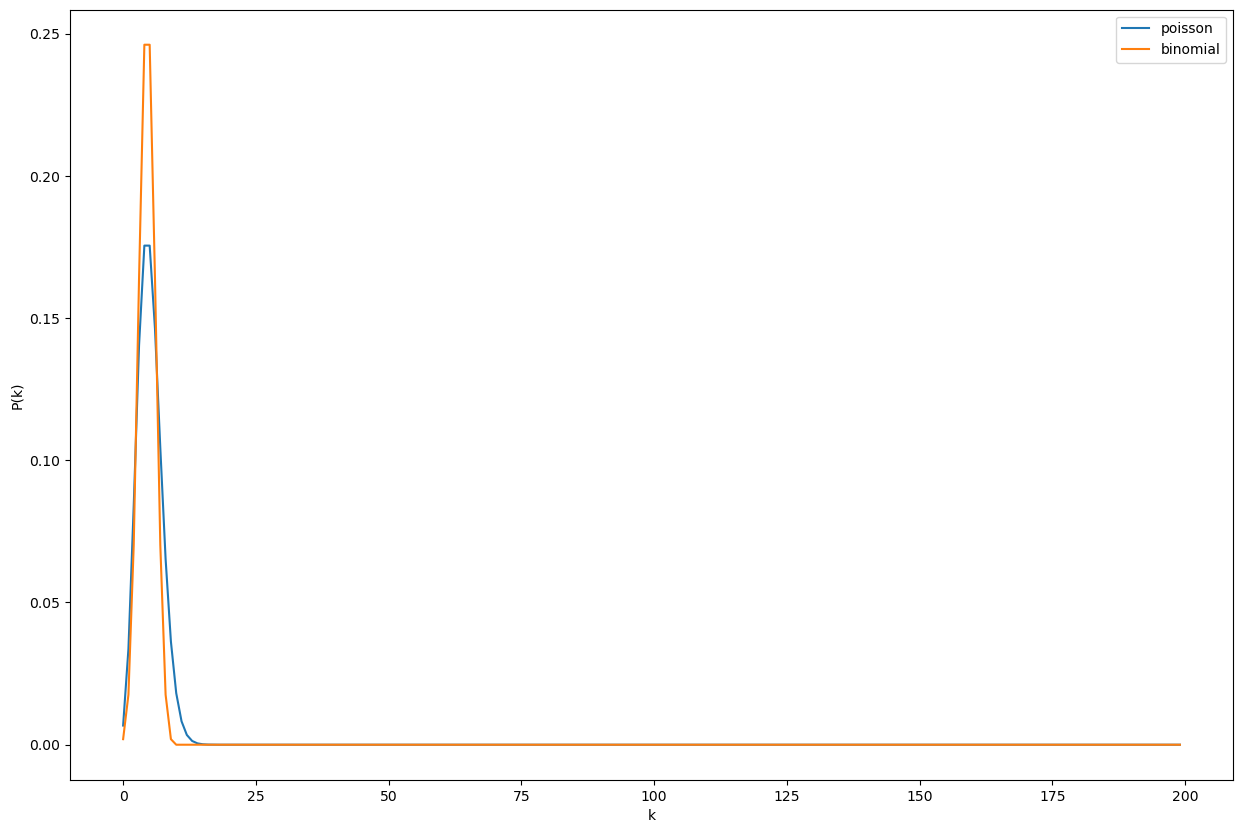

In [7]:
x = np.arange(200)
poisson_y = scipy.stats.poisson.pmf(x, 5)
binomial_y = scipy.stats.binom.pmf(x, 9, 0.5)

plt.plot(x, poisson_y, label="poisson")
plt.plot(x, binomial_y, label="binomial")
plt.legend()
plt.xlabel("k")
plt.ylabel("P(k)")
plt.show()

$P_p(k) = \frac{\lambda^{k}e^{-k}}{k!}$  
$P_b(k) = \binom{n}{k}p^{k}(1-p)^{n-k}$  
  

As $\lim_{k \to \infty}$, in the Poisson Distribution $e^{-k}$ approaches zero, and also $k!$ approaches infinity much faster than $\lambda^{k}$ so the overall expression approaches zero.  
In the Binomial Distribution, $\binom{n}{k}$ approaches 1 (and according to desmos, if $k$ and $n$ are whole, and $k > n$ then $\binom{n}{k}$ is 0), and $p^{k}$ approaches zero, so the overall expression also approaches zero.  
So they both approach zero and thus each other.  

# **B).**

## 7).

In [8]:
# since we only look at the error, it doesn't matter if the length of the screws should be 0 or 10, so we can omit it entirely
screw_length_standard_deviation = 0.12
allowed_screw_length_tolerance = 0.02

z1 = -allowed_screw_length_tolerance/screw_length_standard_deviation
z2 = allowed_screw_length_tolerance/screw_length_standard_deviation

print(f"unsellable percentage = {scipy.stats.norm.cdf(z2)- scipy.stats.norm.cdf(z1):.2%}")

unsellable percentage = 13.24%


## 8).

In [9]:
average_velocity = 2*(10**6)
standard_velocity_deviation = 0.12*(10**6)

measured_velocity = 2.23*(10**6)

standard_velocity_score = (measured_velocity - average_velocity)/standard_velocity_deviation

#a).
print(f"a). standard score = {standard_velocity_score}")

#b).
print(f"b). chance for higher velocity = {1-scipy.stats.norm.cdf(standard_velocity_score)}")

#c).
# perform binary search for accurate results
def approx_equals(n1, n2, tolerance=1e-15):
    return abs(n1-n2) <= tolerance

target = 0.01

higher_bound = measured_velocity
while (1-scipy.stats.norm.cdf((higher_bound - average_velocity)/standard_velocity_deviation) > target):
    higher_bound *= 2

lower_bound = measured_velocity

guess = (higher_bound+lower_bound)/2

calculate_chance = lambda x: 1-scipy.stats.norm.cdf((x - average_velocity)/standard_velocity_deviation)


while (not approx_equals(calculate_chance(guess), target)):
    if (calculate_chance(guess) > target):
        lower_bound = guess 
    elif (calculate_chance(guess) < target):
        higher_bound = guess
    
    guess = lower_bound + ((higher_bound-lower_bound)/2)

print(f"c). {guess}")
print(f"percentage of readings above = {calculate_chance(guess):.15%}")

a). standard score = 1.9166666666666667
b). chance for higher velocity = 0.02764014629301037
c). 2279161.744884899
percentage of readings above = 1.000000000000045%


# **C).**

## 9).

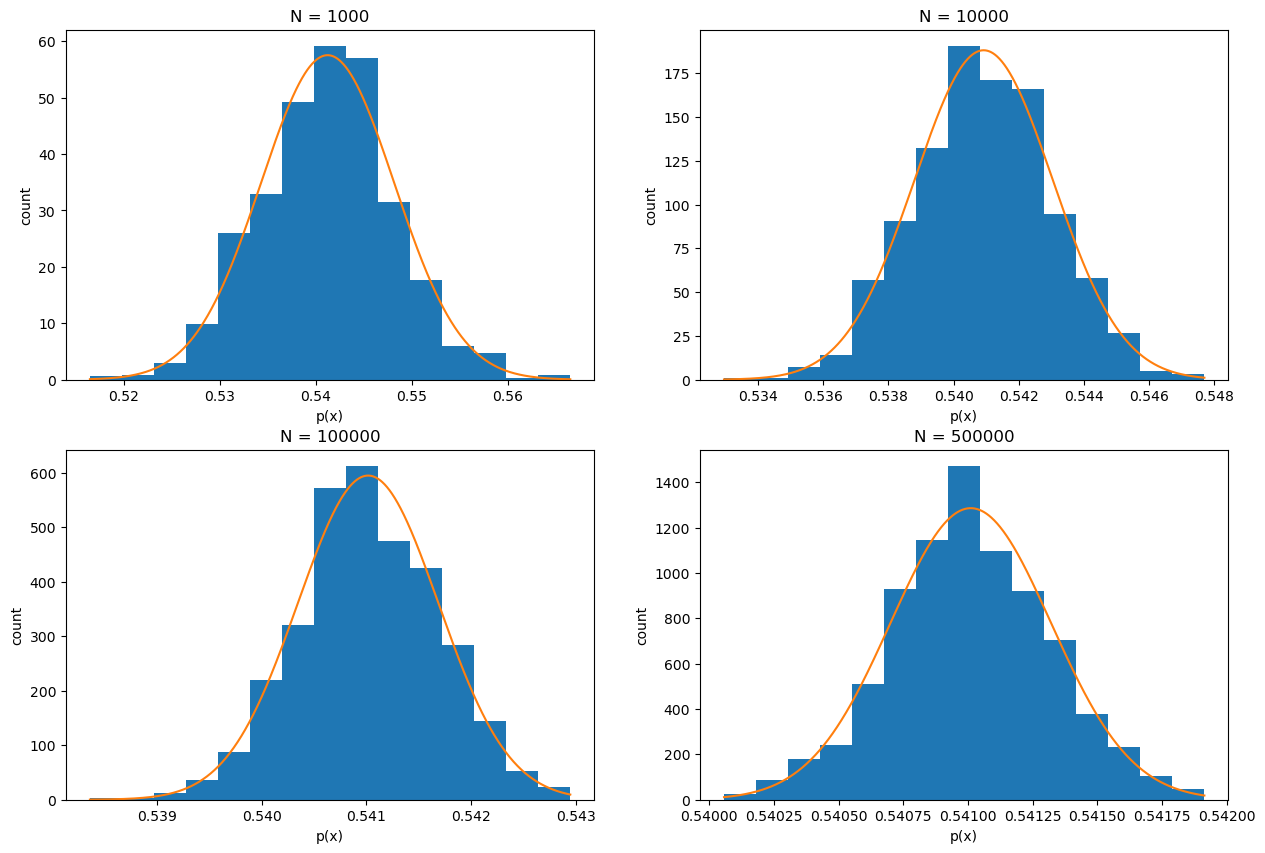

In [10]:
fig,ax = plt.subplots(nrows=2,ncols=2)
((ax1, ax2), (ax3, ax4)) = ax  # unpack axes

axes = [ax1, ax2, ax3, ax4]
lambda_constant = 2
N_values = [1_000, 10_000, 100_000, 500_000]
sample_amount = 1_000
p = lambda x: lambda_constant**(-lambda_constant*x)

for i in range(len(N_values)):
    N = N_values[i]
    curr_ax = axes[i]
    averages = np.array([np.mean(p(np.random.random(N))) for _ in range(sample_amount)])

    central_limit_sigma = np.std(averages)
    central_limit_mu = np.mean(averages)

    x = np.linspace(np.min(averages), np.max(averages), 1_000)
    y = lambda x: (1/(central_limit_sigma*((2*scipy.constants.pi)**0.5)))*np.exp(-((x-central_limit_mu)**2)/(2*(central_limit_sigma**2)))

    curr_ax.hist(averages, bins=15, density=1)
    curr_ax.plot(x, y(x))
    curr_ax.set_title(f"N = {N}")
    curr_ax.set_xlabel("p(x)")
    curr_ax.set_ylabel("count")
plt.show()

# **D).**

## 10).

99% | Estimated time left: 0.08 secondss

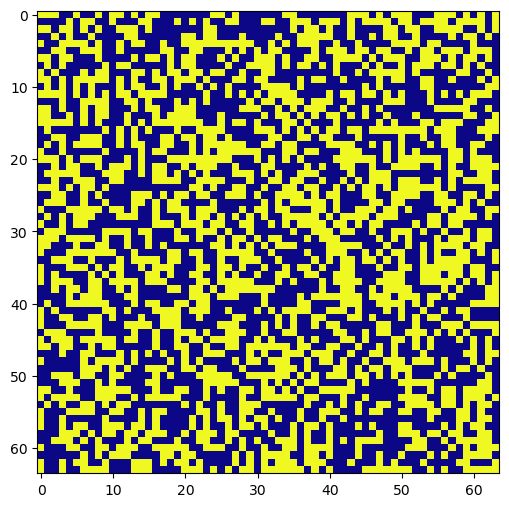

In [24]:
# parameters
kB = 1
J = 1
T = 0.5
outside_energy_H = -0.1

# chance for flipping with dE
p = lambda dE: np.exp(-(dE)/(kB*T))

# helper functions for more readable code
def get_energy_of_particle(particles_in, i_in, j_in):
    sum = 0
    for direction in [(i_in, (j_in+1)%particles_in.shape[1]), (i_in, (j_in-1)), ((i_in+1)%particles_in.shape[1], j_in), ((i_in-1), j_in)]:
        sum += particles_in[i_in][j_in]*particles_in[direction[0]][direction[1]]
    return -J*sum - (outside_energy_H*particles_in[i_in][j_in])

def get_total_magnetism(particles_in):
    return abs((np.sum(particles_in))/(N**2))



N = 64
time_limit = 600


fig, (particles_ax) = plt.subplots(ncols=1, figsize=(6, 6))

particles = np.random.choice([-1, 1], size=(N, N))
magnetisms = np.empty(time_limit)
im = particles_ax.imshow(particles, cmap='plasma', vmin=-1, vmax=1)

all_particles = np.empty((time_limit, N, N))
all_particles[0] = np.copy(particles)


# advances the original grid, particles, by one frame
def advance(frame, show_progress = True):
    if show_progress:
        progress = frame/time_limit
        sys.stdout.write("\r")
        sys.stdout.write(str(int(100*(progress))) + "%")
        if frame % 3 == 1:
            sys.stdout.write(f" | Estimated time left: {((1/progress)*(time.time()-start_seconds))-(time.time()-start_seconds):.2f} seconds")
        sys.stdout.flush()
    
    magnetisms[frame] = get_total_magnetism(particles)
    
    # compare to a clone to ensure no "sweeping" effect (where it goes left-to-right and top-to-bottom)
    clone = np.copy(particles)

    # internal logic
    for _ in range(N**2):
        i = np.random.randint(0, N)
        j = np.random.randint(0, N)
        E1 = get_energy_of_particle(clone, i, j)
        clone[i][j] *= -1
        E2 = get_energy_of_particle(clone, i, j)
        clone[i][j] *= -1
        dE = (E2-E1) + 2*outside_energy_H
        if dE <= 0:
            particles[i][j] *= -1
        elif np.random.rand() < p(dE):
            particles[i][j] *= -1

start_seconds = time.time()
for i in range(1, time_limit):
    advance(i)
    all_particles[i] = np.copy(particles)


def anim_init():
    global start_seconds
    start_seconds = time.time()
    im.set_array(all_particles[0])
    return (im, )

def anim_advance(frame):
    if frame == 0:
        return (im, )
    global all_particles

    progress = frame/time_limit
    sys.stdout.write("\r")
    sys.stdout.write(str(int(100*(progress))) + "%")
    if frame % 3 == 1:
            sys.stdout.write(f" | Estimated time left: {((1/progress)*(time.time()-start_seconds))-(time.time()-start_seconds):.2f} seconds")
    sys.stdout.flush()

    im.set_array(all_particles[frame])
    return (im, )


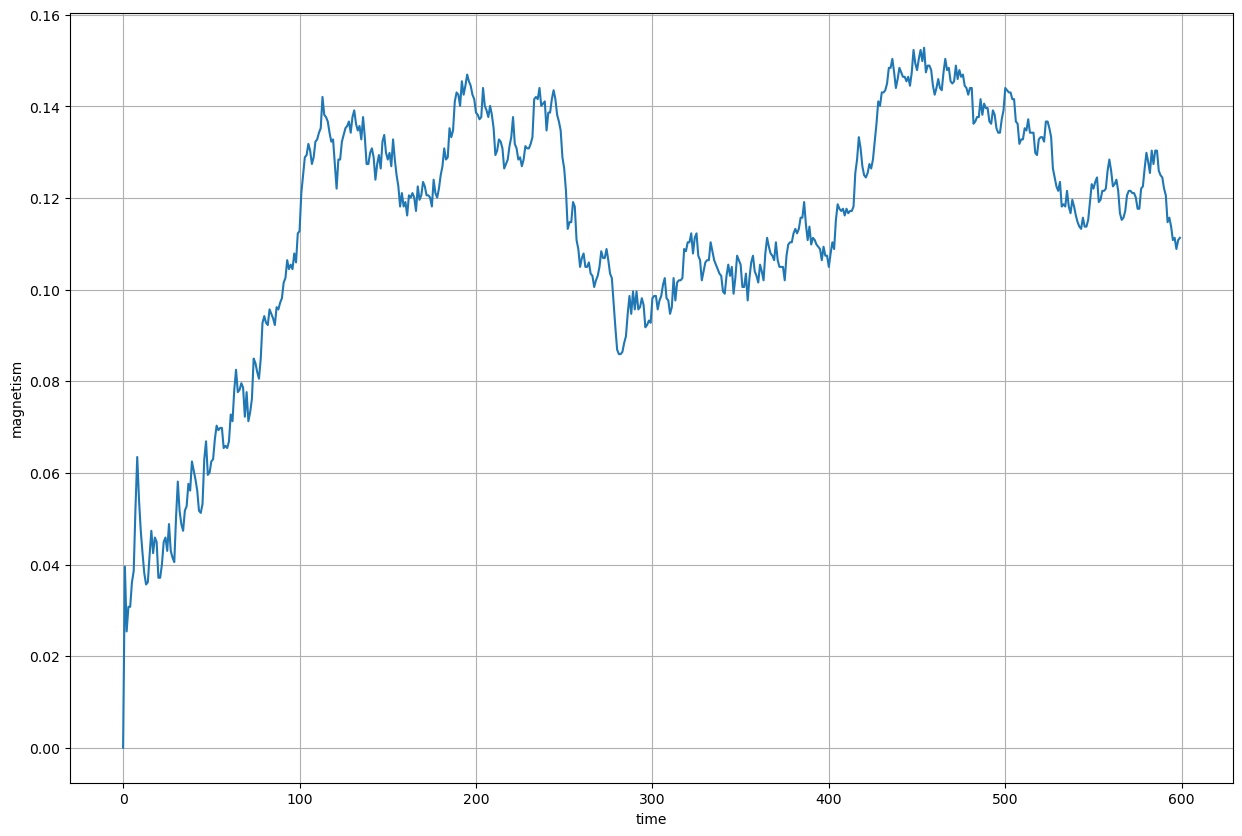

99% | Estimated time left: 0.07 secondss

In [27]:
anim = FuncAnimation(
    fig,
    anim_advance,
    init_func=anim_init,
    frames=time_limit,
    interval=20,
    blit=True
)

plt.plot(list(range(time_limit)), magnetisms)
plt.xlabel("time")
plt.ylabel("magnetism")
plt.grid()
plt.show()
HTML(anim.to_jshtml())  # show as html